In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading the dataset
df=pd.read_csv('/content/drive/MyDrive/Indian_Kids_Screen_Time.csv')

In [3]:
#Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Displaying dataset
df

Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female                      1.21         Laptop   
4      12  Female                      5.89     Smartphone   
...   ...     ...                       ...            ...   
9707   17    Male                      3.26     Smartphone   
9708   17  Female                      4.43     Smartphone   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0.42   
1                           True                               0.30   
2                           True                               0.32   
3                          False                               0.39   
4                           True                               0.49   
...                          ...                                ...   
9707                        True                               0.44   
9708                        True                               0.40   
9709                        True                               0.39   
9710                        True                               0.43   
9711                        True                               0.33   

                       Health_Impacts Urban_or_Rural  
0              Poor Sleep, Eye Strain          Urban  
1                          Poor Sleep          Urban  
2                          Poor Sleep          Urban  
3                                 NaN          Urban  
4                 Poor Sleep, Anxiety          Urban  
...                               ...            ...  
9707                       Poor Sleep          Urban  
9708                       Poor Sleep          Rural  
9709  Poor Sleep, Eye Strain, Anxiety          Rural  
9710                       Poor Sleep          Urban  
9711                          Anxiety          Urban  

[9712 rows x 8 columns]

In [5]:
#Display first 5 rows of dataset
df.head()

Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anxiety          Urban

In [6]:
#Display last 5 rows of dataset
df.tail()

Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
9707   17    Male                      3.26     Smartphone   
9708   17  Female                      4.43     Smartphone   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
9707                        True                               0.44   
9708                        True                               0.40   
9709                        True                               0.39   
9710                        True                               0.43   
9711                        True                               0.33   

                       Health_Impacts Urban_or_Rural  
9707                       Poor Sleep          Urban  
9708                       Poor Sleep          Rural  
9709  Poor Sleep, Eye Strain, Anxiety          Rural  
9710                       Poor Sleep          Urban  
9711                          Anxiety          Urban

In [7]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [8]:
df.describe()

Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1.718232   
min       8.000000                  0.000000   
25%      10.000000                  3.410000   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9712.000000  
mean                            0.427226  
std                             0.073221  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [10]:
df.shape

(9712, 8)

In [11]:
df1=df[['Primary_Device','Health_Impacts']][2:10:2]
df1

Primary_Device       Health_Impacts
2             TV           Poor Sleep
4     Smartphone  Poor Sleep, Anxiety
6             TV                  NaN
8         Laptop  Poor Sleep, Anxiety

In [12]:
df['Gender']=df['Gender'].astype('category')
df['Urban_or_Rural']=df['Urban_or_Rural'].astype('category')

In [13]:
df['Gender']
df['Urban_or_Rural']

0       Urban
1       Urban
2       Urban
3       Urban
4       Urban
        ...  
9707    Urban
9708    Rural
9709    Rural
9710    Urban
9711    Urban
Name: Urban_or_Rural, Length: 9712, dtype: category
Categories (2, object): ['Rural', 'Urban']

Text(0, 0.5, 'Frequency')

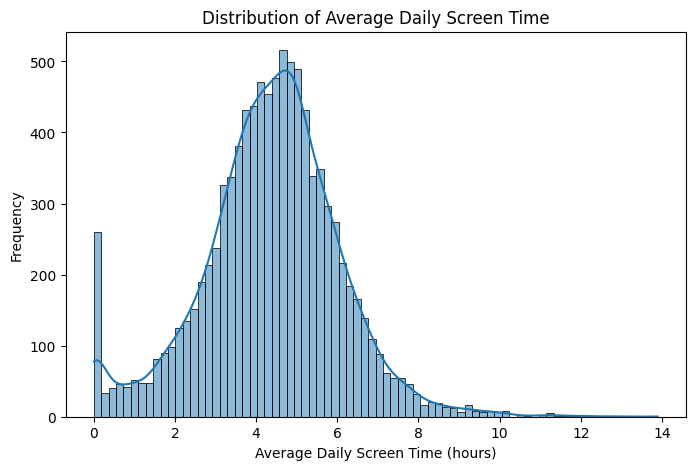

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'],kde=True)
plt.title("Distribution of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

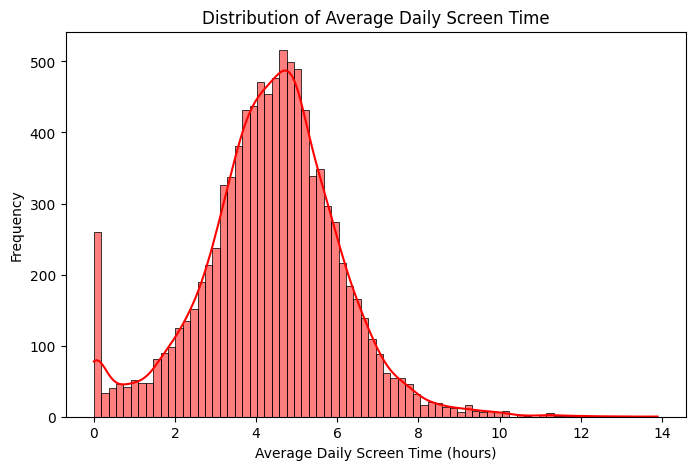

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'],kde=True,color="Red")
plt.title("Distribution of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

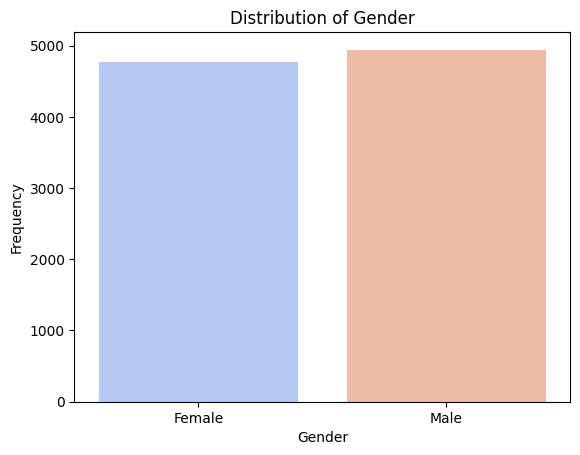

In [16]:
sns.countplot(x='Gender',data=df,color="Green",palette='coolwarm',hue='Gender')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

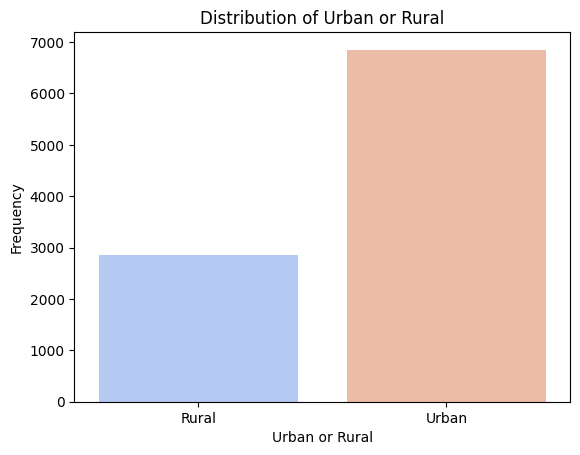

In [17]:
sns.countplot(x='Urban_or_Rural',data=df,palette='coolwarm',hue='Urban_or_Rural')
plt.title("Distribution of Urban or Rural")
plt.xlabel("Urban or Rural")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

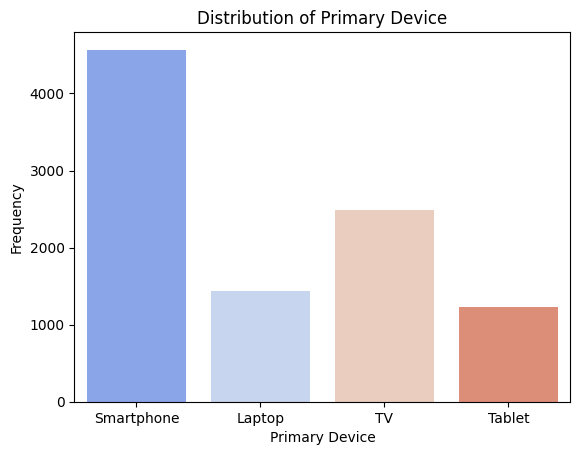

In [18]:
sns.countplot(x='Primary_Device',data=df,palette='coolwarm',hue='Primary_Device')
plt.title("Distribution of Primary Device")
plt.xlabel("Primary Device")
plt.ylabel("Frequency")

Text(0, 0.5, 'Average Daily Screen Time (hours)')

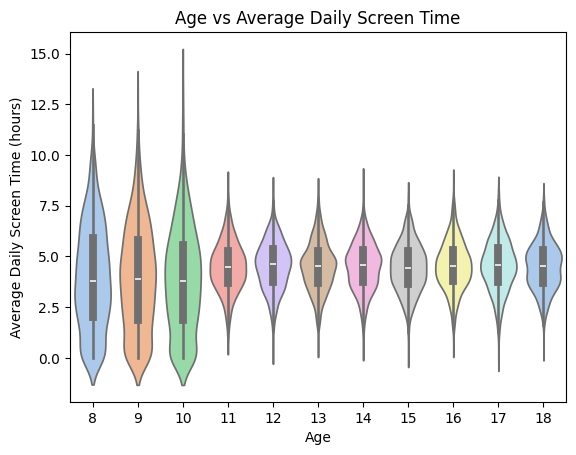

In [19]:
sns.violinplot(x='Age',y='Avg_Daily_Screen_Time_hr',data=df,hue='Age',palette='pastel',legend=False)
plt.title("Age vs Average Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")

Text(0, 0.5, 'Average Daily Screen Time (hours)')

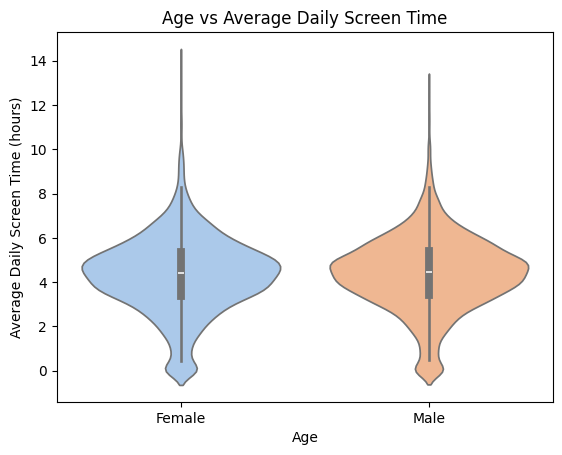

In [20]:
sns.violinplot(x='Gender',y='Avg_Daily_Screen_Time_hr',data=df,hue='Gender',palette='pastel',legend=False)
plt.title("Age vs Average Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")

Text(0, 0.5, 'Average Daily Screen Time (hours)')

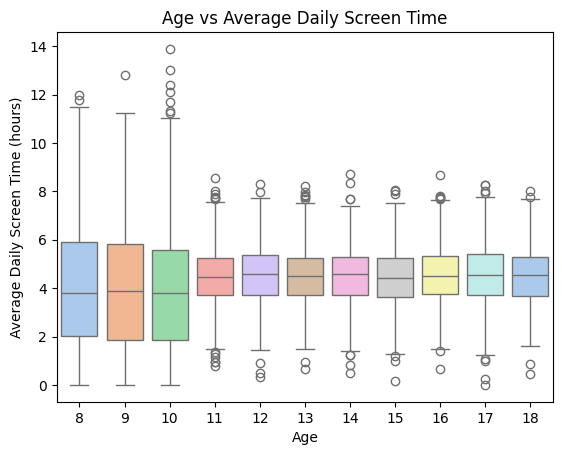

In [21]:
sns.boxplot(x='Age',y='Avg_Daily_Screen_Time_hr',data=df,hue='Age',palette='pastel',legend=False)
plt.title("Age vs Average Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")

Text(0, 0.5, 'Average Daily Screen Time (hours)')

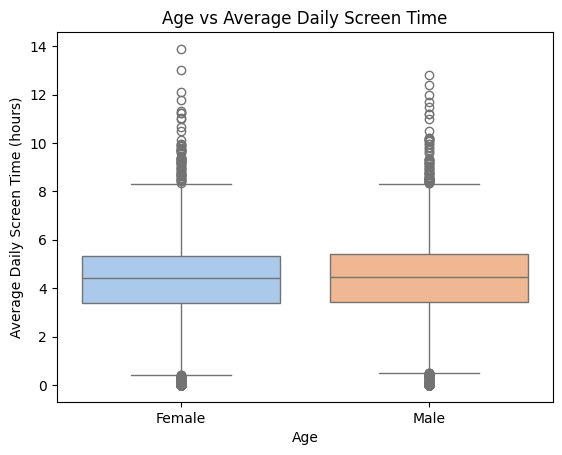

In [22]:
sns.boxplot(x='Gender',y='Avg_Daily_Screen_Time_hr',data=df,hue='Gender',palette='pastel',legend=False)
plt.title("Age vs Average Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")

Text(0, 0.5, 'Frequency')

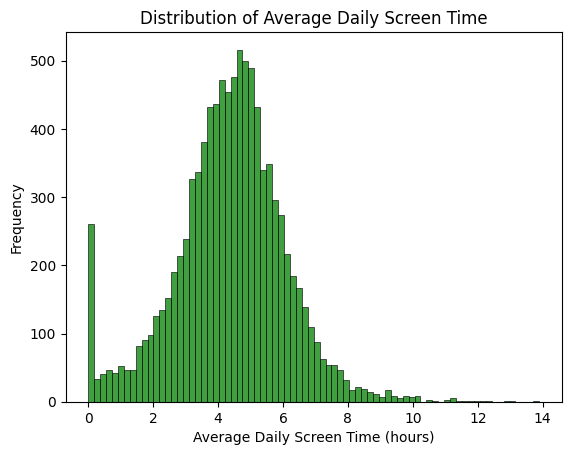

In [23]:
sns.histplot(df['Avg_Daily_Screen_Time_hr'],color="Green")
plt.title("Distribution of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

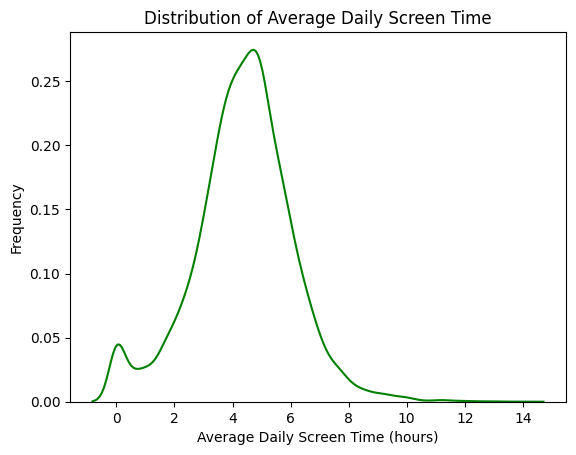

In [24]:
sns.kdeplot(df['Avg_Daily_Screen_Time_hr'],color="Green")
plt.title("Distribution of Average Daily Screen Time")
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

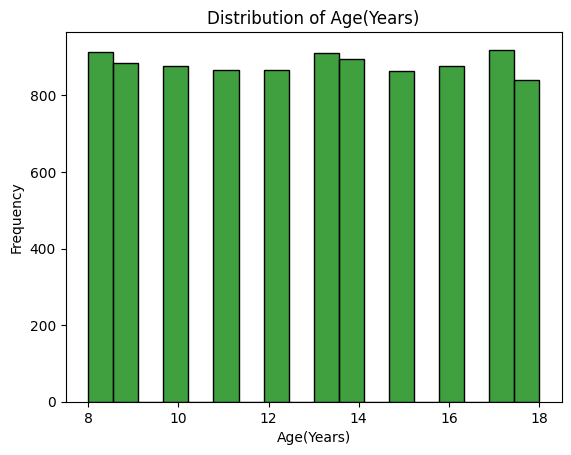

In [25]:
sns.histplot(df['Age'],color="Green")
plt.title("Distribution of Age(Years)")
plt.xlabel("Age(Years)")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

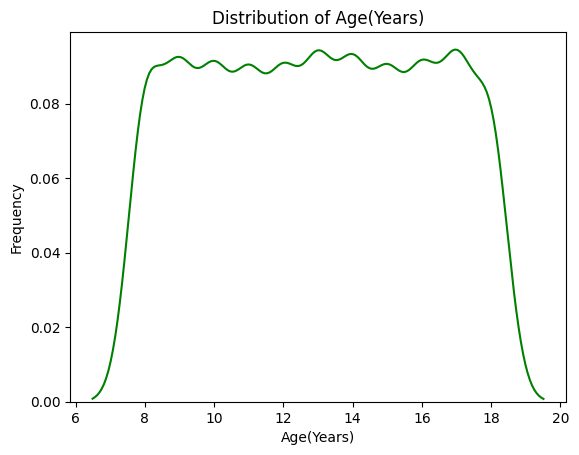

In [26]:
sns.kdeplot(df['Age'],color="Green")
plt.title("Distribution of Age(Years)")
plt.xlabel("Age(Years)")
plt.ylabel("Frequency")


Text(0, 0.5, 'Average Daily Screen Time (hours)')

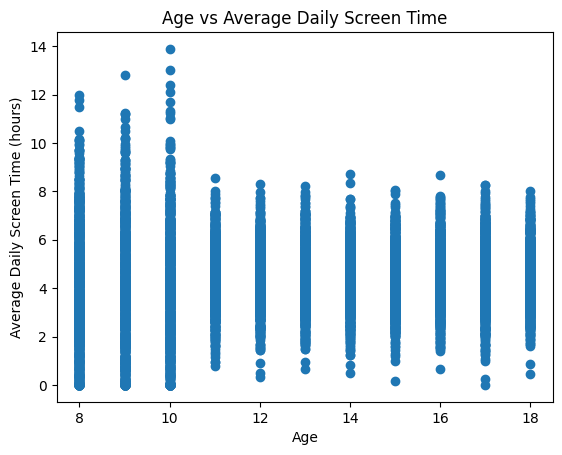

In [27]:
plt.scatter(df['Age'],df['Avg_Daily_Screen_Time_hr'])
plt.title("Age vs Average Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Average Daily Screen Time (hours)")

Text(0, 0.5, 'Average Screen Time (hrs)')

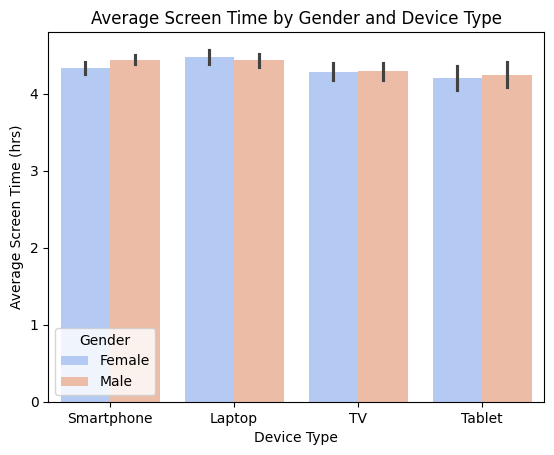

In [28]:
sns.barplot(data=df, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='coolwarm')
plt.title('Average Screen Time by Gender and Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Screen Time (hrs)')

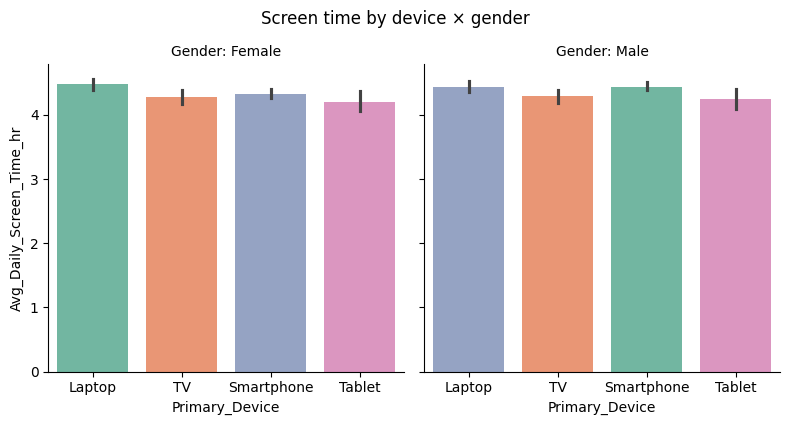

In [29]:
g = sns.FacetGrid(df, col='Gender', height=4, aspect=1)
g.map_dataframe(sns.barplot, x='Primary_Device', y='Avg_Daily_Screen_Time_hr', palette='Set2',hue='Primary_Device')
g.set_axis_labels('Primary_Device', 'Avg_Daily_Screen_Time_hr')
g.set_titles('Gender: {col_name}')
g.fig.suptitle('Screen time by device × gender', y=1.05)
plt.show()

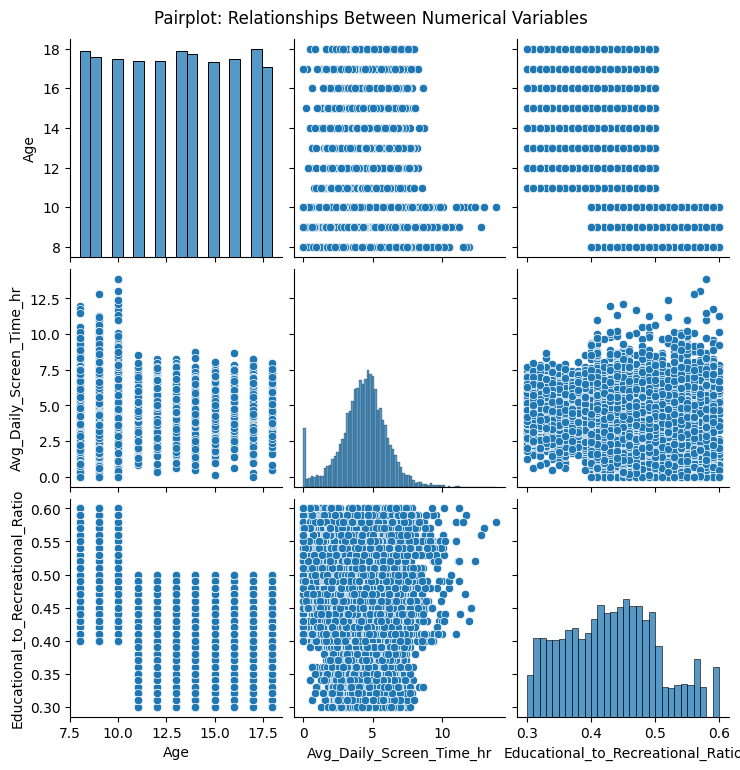

In [30]:
sns.pairplot(
    df,
    vars=['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
)
plt.suptitle('Pairplot: Relationships Between Numerical Variables', y=1.02)
plt.show()

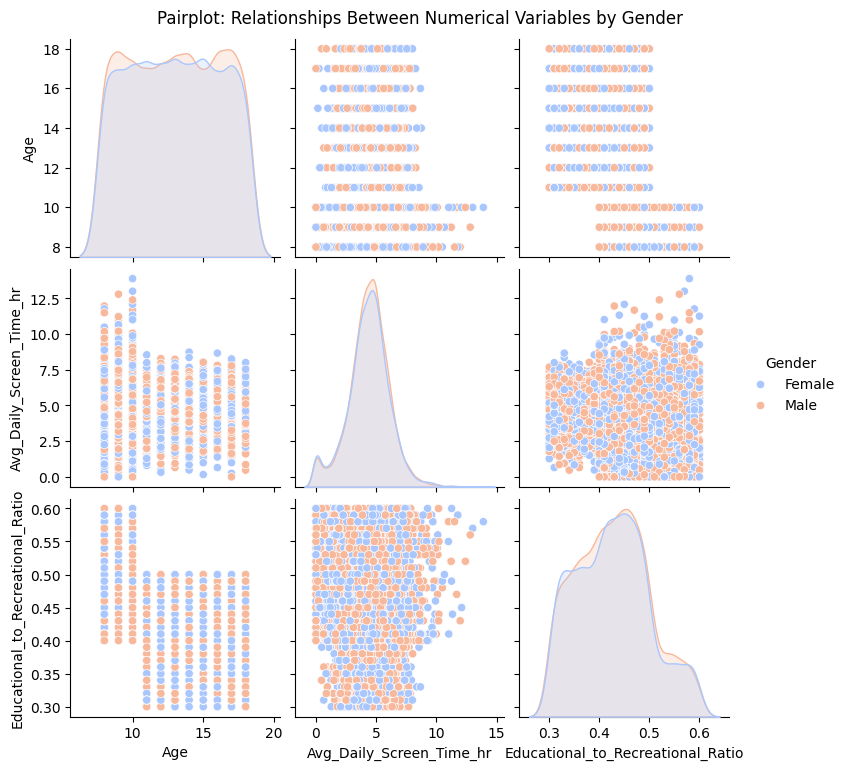

In [31]:
sns.pairplot(
    df,
    vars=['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio'],
    hue='Gender',
    palette='coolwarm'
)
plt.suptitle('Pairplot: Relationships Between Numerical Variables by Gender', y=1.02)
plt.show()

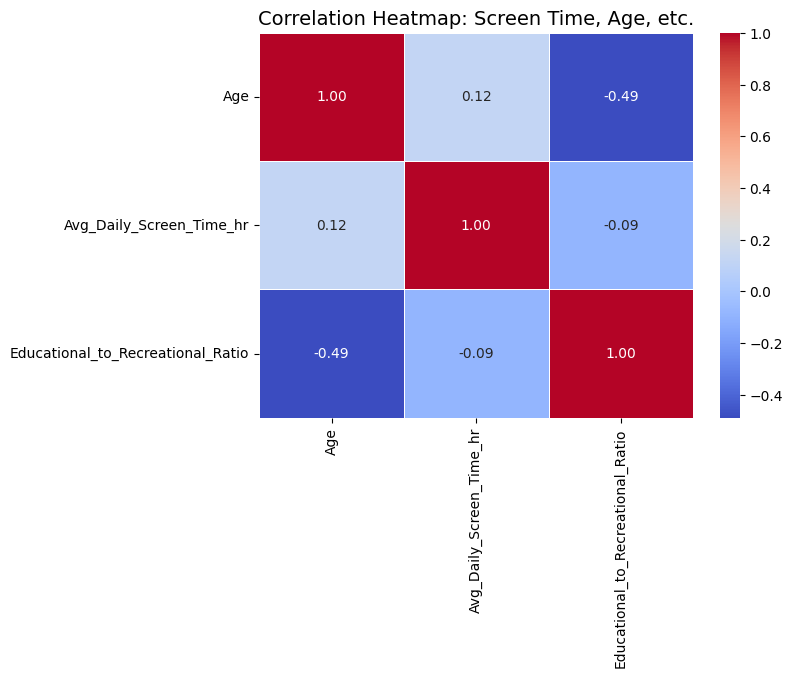

In [33]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Screen Time, Age, etc.", fontsize=14)
plt.show()